In [1]:
## verify the python version to work with the tflite model maker
!python --version

Python 3.9.16


In [2]:
# arrange numpy dependency (<1.24) to work with tflite model maker
import numpy as np
np.version.version

'1.23.5'

In [3]:
# make sure tensorflow is installed and running on version > 2
import tensorflow as tf
assert tf.__version__.startswith('2')

In [4]:
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [5]:
# local dependency 
!pip3 install chardet

In [9]:
## load 5 classes with RGB converted...
data = DataLoader.from_folder("/home/stark/thesis/sram/dataxmc/tflite-exp/dataset/corrupted-5-rgb")

INFO:tensorflow:Load image with size: 505, num_label: 5, labels: board0004, board000B, board0052, board0074, board0083.


In [23]:
# split

train_data, rest_data = data.split(0.80)
validation_data, test_data = rest_data.split(0.5)


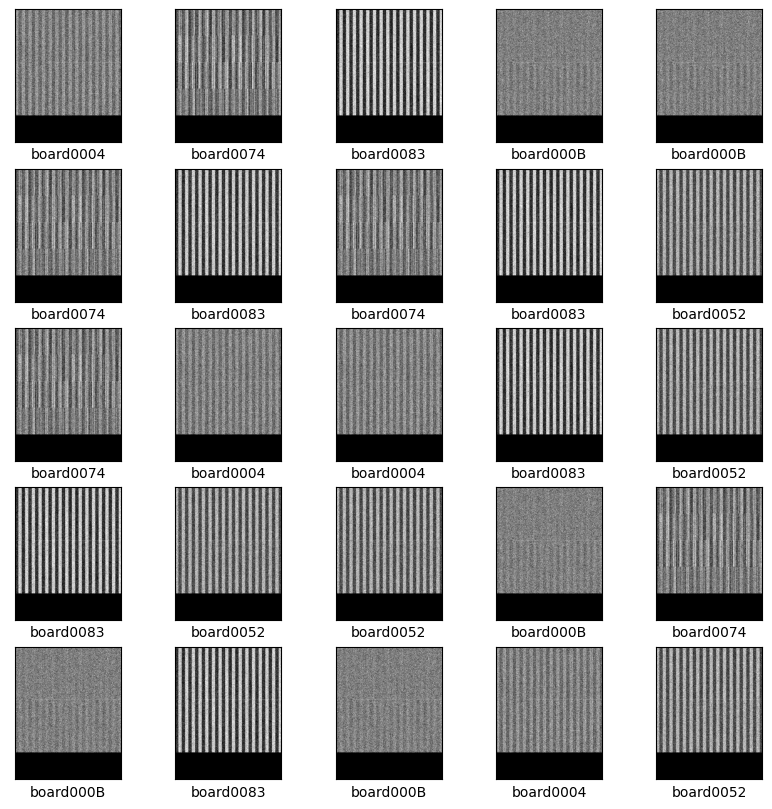

In [24]:
## show dataset with class labels
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()


In [25]:
## EfficientNet-Lite0 with hyperparameters
model = image_classifier.create(train_data,
                                validation_data=validation_data,
                                model_spec=model_spec.get('efficientnet_lite0'), 
                                learning_rate=0.0005,
                                batch_size=32,
                                dropout_rate=0.75,
                                epochs=5) 


INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_8 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
12/12 [==============================] - 8s 589ms/step - loss: 2.1105 - accuracy: 0.2057 - val_loss: 1.3362 - val_accuracy: 0.7200
Epoch 2/5
12/12 [==============================] - 8s 634ms/step - loss: 1.5689 - accuracy: 

In [26]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_8 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


In [27]:
loss, accuracy = model.evaluate(test_data)

2/2 [==============================] - 2s 127ms/step - loss: 0.6380 - accuracy: 1.0000


In [28]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs_range = range(5)

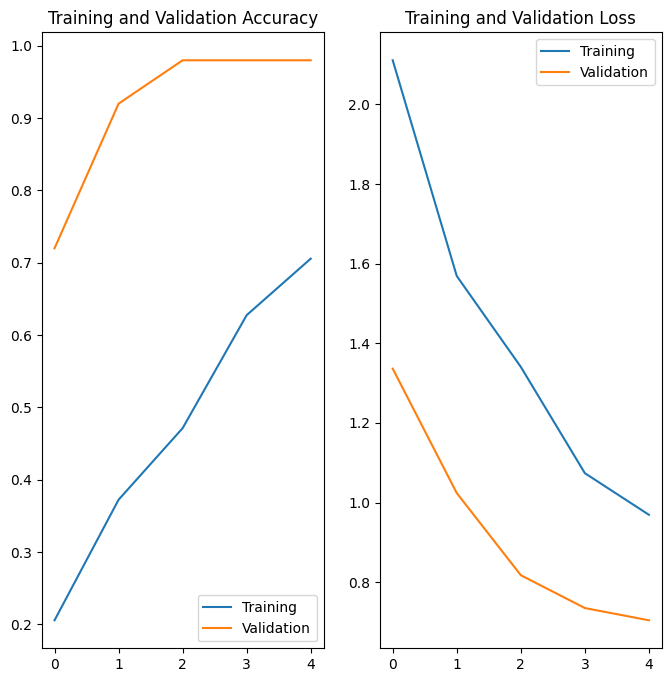

In [29]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
model.export(export_dir='/home/stark/thesis/sram/dataxmc/tflite-exp/experiments/corrupted-5/efficientnet')

2023-10-23 23:37:37.152779: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpsmbkl41h/assets


INFO:tensorflow:Assets written to: /tmp/tmpsmbkl41h/assets
2023-10-23 23:37:40.066374: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-10-23 23:37:40.066475: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2023-10-23 23:37:40.096319: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1164] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 913 nodes (656), 923 edges (664), time = 17.294ms.
  function_optimizer: function_optimizer did nothing. time = 0.011ms.

/home/stark/miniconda3/envs/py39/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-10-23 23:37:40.527723: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored 

INFO:tensorflow:Label file is inside the TFLite model with metadata.


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpz8exi1sy/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpz8exi1sy/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /home/stark/thesis/sram/dataxmc/tflite-exp/experiments/corrupted-5/efficientnet/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /home/stark/thesis/sram/dataxmc/tflite-exp/experiments/corrupted-5/efficientnet/model.tflite


In [31]:
model.export(export_dir='/home/stark/thesis/sram/dataxmc/tflite-exp/experiments/corrupted-5/efficientnet', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in /home/stark/thesis/sram/dataxmc/tflite-exp/experiments/corrupted-5/efficientnet/labels.txt


INFO:tensorflow:Saving labels in /home/stark/thesis/sram/dataxmc/tflite-exp/experiments/corrupted-5/efficientnet/labels.txt


In [33]:
model.evaluate_tflite('/home/stark/thesis/sram/dataxmc/tflite-exp/experiments/corrupted-5/efficientnet/model.tflite', test_data)

{'accuracy': 0.9803921568627451}